In [284]:
import pandas as pd

In [285]:
ss = pd.read_csv('Assignment 3 Sentiment Scores.csv')

In [286]:
ss.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [287]:
senti.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass,...,XJ_Sclass,Sclass_ES,Sclass_LS,Sclass_RX,Sclass_A8,Sclass_A6,Sclass_3series,Sclass_5series,Sclass_7series,Sclass_XJ
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0,...,1.0,NaN,NaN,-3.0,-2.0,NaN,NaN,NaN,-4.0,-1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0,...,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0,...,2.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,-2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN


In [329]:
senti = ss.copy()

In [337]:
for i in range(len(ss.columns)):
    for ii in range(i+1,len(ss.columns)):
            temp = ss.columns[i] +'_'+ss.columns[ii]
            senti[temp]=ss[ss.columns[i]]-ss[ss.columns[ii]]

In [339]:
import numpy as np

use = []
for q in senti.columns[10:]:
    #qq = sum(senti[q].dropna())/(len(senti[q]) - senti[q].count(None))
    p1,p2 = re.split('_',q)
    neg = (senti[q]<0)
    neg_sent  = senti[q][neg].sum()/senti[q][neg].count()
    pos = (senti[q]>0)
    pos_sent  = senti[q][pos].sum()/senti[q][pos].count()
    use.append((p1,p2,pos_sent,neg_sent))

In [374]:
use[:10]

[('ES', 'LS', 1.1666666666666667, -2.0),
 ('ES', 'RX', 1.6666666666666667, -2.0),
 ('ES', 'A8', 3.4, -3.0),
 ('ES', 'A6', 6.0, -1.6666666666666667),
 ('ES', '3series', 3.25, -6.0),
 ('ES', '5series', 4.0, -5.0),
 ('ES', '7series', 3.6, -2.8),
 ('ES', 'XJ', 1.0, -1.0),
 ('ES', 'Sclass', 3.2857142857142856, -2.6153846153846154),
 ('LS', 'RX', 3.4, -1.1428571428571428)]

In [291]:
import re
re.split('_',senti.columns[10])

['ES', 'LS']

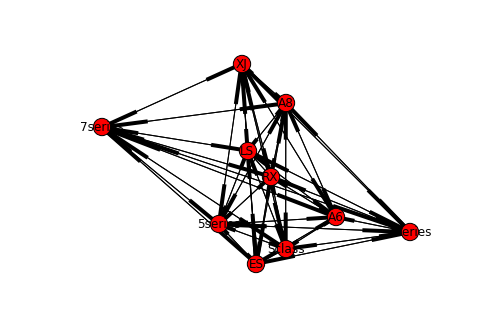

In [342]:
import matplotlib.pyplot as plt

%matplotlib inline

G = nx.DiGraph()

G.add_nodes_from(ss.columns)

for a,b,pos,neg in use:
    if c!=0 :
        G.add_edge(b,a,{'weight':pos})
    if d!=0:
        G.add_edge(a,b,{'weight':abs(neg)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

In [381]:
pr = nx.pagerank(G, alpha=0.85,weight='weight')

In [382]:
pr_df = pd.DataFrame.from_dict(pr,orient='index')
pr_df = pr_df.reset_index()
pr_df.columns=['Model','pr']
cs = pd.read_csv('/Users/leeanthea/Desktop/car_sales.csv')
cs = cs.merge(pr_df)

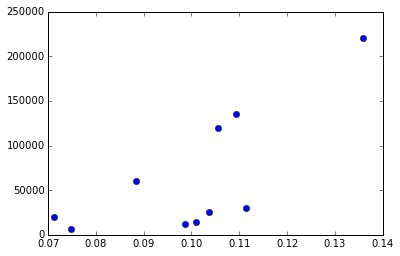

In [383]:
plt.plot(cs['pr'], cs['Sales'], marker='o', linestyle='')

In [299]:
u1 = pd.DataFrame.count(ss)


u1 = u1.to_frame()


In [300]:
u1 = u1.reset_index()

u1.columns = ['Model','sentcount']

u1

,Model,sentcount
0,ES,70
1,LS,319
2,RX,58
3,A8,167
4,A6,43
5,3series,29
6,5series,29
7,7series,101
8,XJ,37
9,Sclass,233


In [301]:
cs = cs.merge(u1)
cs = cs.merge(u2)

In [303]:
u2 = pd.DataFrame.sum(ss)



u2 = u2.to_frame()

u2 = u2.reset_index()


u2.columns = ['Model','sentscore']

u2

,Model,sentscore
0,ES,96.0
1,LS,398.0
2,RX,105.0
3,A8,206.0
4,A6,44.0
5,3series,34.0
6,5series,21.0
7,7series,104.0
8,XJ,56.0
9,Sclass,225.0


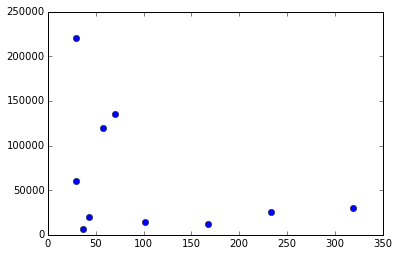

In [304]:
plt.plot(cs['sentcount'], cs['Sales'], marker='o', linestyle='')

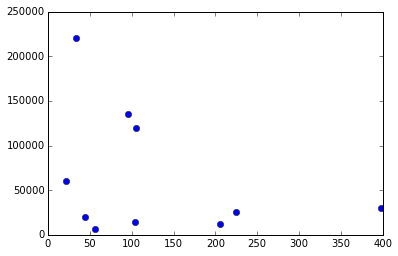

In [306]:
plt.plot(cs['sentscore'], cs['Sales'], marker='o', linestyle='')